In [1]:
!pip install shioaji
import numpy as np
import pandas as pd
import requests
import shioaji as sj
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.dates as mdates
import datetime
from datetime import timedelta
from matplotlib.dates import date2num
from google.colab import userdata

# 建立API物件，simulation=True是代表測試帳號
api = sj.Shioaji(simulation=True)

#==== for Colab
shioaji_secret=userdata.get('SHIOAJI_SECRETKEY')
shioaji_apikey=userdata.get('SHIOAJI_APIKEY')

# 登入你的key
accounts = api.login(shioaji_apikey, shioaji_secret)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 694.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.3/145.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: filelock
    Found existing installation: filelock 3.16.0
    Uninstalling filelock-3.16.0:
      Successfully uninstalled filelock-3.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour 

2024-09-20 13:50:20.869 | WARNING  | importlib._bootstrap:_call_with_frames_removed:241 - Optional: pip install shioaji[speed] for better performance.


Response Code: 0 | Event Code: 0 | Info: host '210.59.255.161:80', IP 210.59.255.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total connection attempt 1 of 1) | Event: Session up


In [2]:
# # k棒的api使用方式
# kbars = api.kbars(
#     contract=api.Contracts.Stocks["2449"],
#     start="2023-01-01",
#     end="2024-03-21",
# )
# df = pd.DataFrame({**kbars})
# df.ts = pd.to_datetime(df.ts)
# df.set_index('ts',inplace=True)


# # 週k最後一天13:30的K棒 , dropna清除NaN的值
# weekly_df=df.resample('W').last().dropna()

# 取得日 K 資料
kbars = api.kbars(
    contract=api.Contracts.Stocks["2449"],
     start="2023-01-01",
     end="2024-03-21",
)

# 將資料轉換為 DataFrame
df = pd.DataFrame({**kbars})
df['ts'] = pd.to_datetime(df['ts'])

# 按週分組，並計算每週的開盤、最高、最低、收盤和成交量
df.set_index('ts', inplace=True)

# 定義週 K 的聚合方式
weekly_df = df.resample('W').agg({
    'Open': 'first',       # 每週第一天的開盤價
    'High': 'max',         # 每週最高價
    'Low': 'min',          # 每週最低價
    'Close': 'last',       # 每週最後一天的收盤價
    'Volume': 'sum'        # 每週總成交量
}).dropna()  # 移除有空值的週



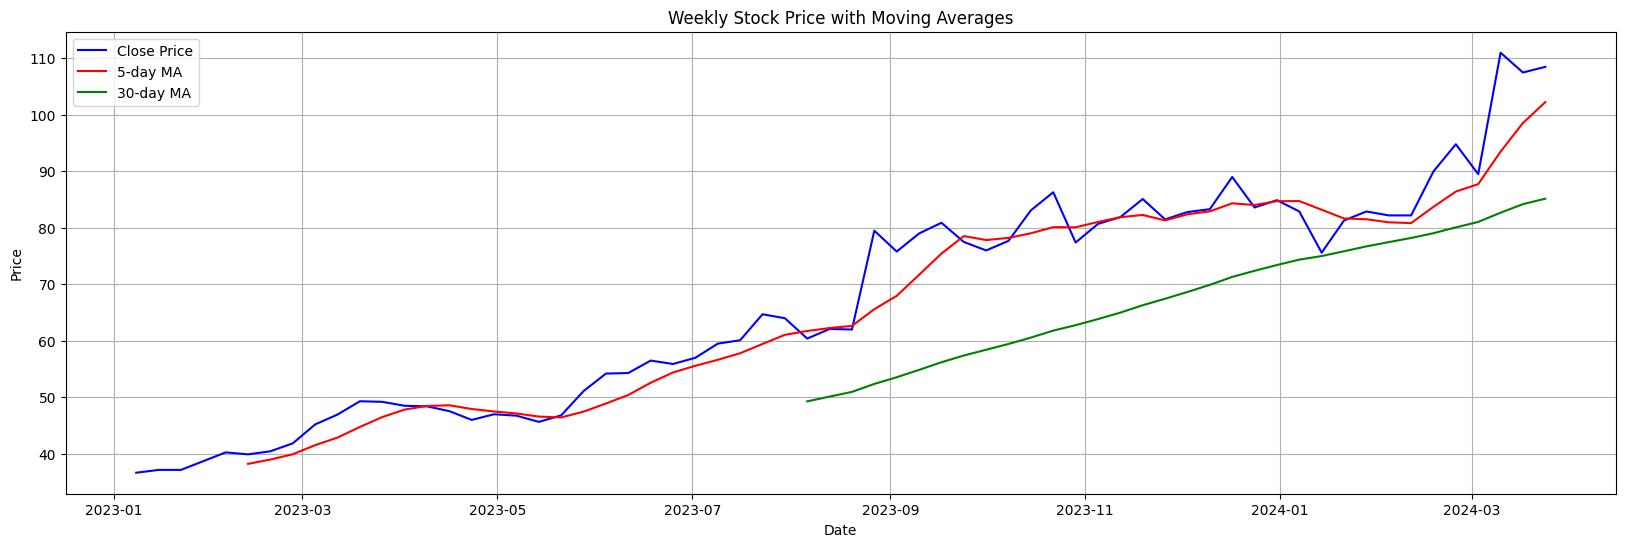

In [3]:
# 計算5日均線和30日均線
weekly_df['5MA'] = weekly_df['Close'].rolling(window=5).mean()
weekly_df['30MA'] = weekly_df['Close'].rolling(window=30).mean()

# 繪製收盤價、5日均線和30日均線
plt.figure(figsize=(20, 6))
plt.plot(weekly_df.index, weekly_df['Close'], label='Close Price', color='blue')
plt.plot(weekly_df.index, weekly_df['5MA'], label='5-day MA', color='red')
plt.plot(weekly_df.index, weekly_df['30MA'], label='30-day MA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Stock Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()